# Logistic  Regression

by its name dont think that it is a regression problem. Logistic Regression it is used for Classfication problem.
it formulae  is given by 1/(1+e^-y),Now y is my independent random variable which depends upon the independent 
random variables

which ever the value you give it to this model it will convert it into 1 or 0
if its value greater than or equal to 0.5 it will give 1 ,otherwise it assigns to it 0
based on this feature this model will work

In [1]:
import numpy as np
import random

In [2]:
import pandas as pd 
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dummies = pd.get_dummies(df.Sex)

In [9]:
df=pd.concat([df,dummies],axis=1)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [11]:
df.Age = df.Age.fillna(df.Age.median())

In [12]:
df.Age.isnull().sum()

0

In [19]:
df['Embarked'] = df['Embarked'].fillna('M')

In [20]:
df.Embarked.isnull().sum()

0

In [22]:
dummies1 = pd.get_dummies(df.Embarked)

In [23]:
dummies1

,C,M,Q,S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
886,0,0,0,1
887,0,0,0,1
888,0,0,0,1
889,1,0,0,0


In [24]:
df=pd.concat([df,dummies1],axis=1)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,M,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,0,1


### preparing the dataset

In [26]:
X = df.drop(["PassengerId","Survived","Name","Sex","Ticket","Cabin","Embarked"],axis=1)

In [29]:
y=df.Survived

### train test split  the given data

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### preparing the model

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=10.0)

In [36]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
model.score(X_test,y_test)

0.7873134328358209

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score,classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(69.0, 0.5, 'Truth')

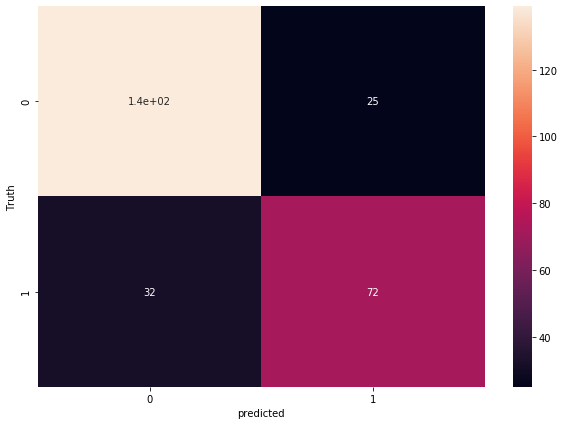

In [43]:

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       164
           1       0.74      0.69      0.72       104

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [46]:
r2_score(y_test,y_pred)

0.10436210131332091